# Introduction

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form)

### $H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$

or with the rotating-wave approximation

### $H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$

where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from numpy import linalg
from scipy.linalg import expm as expmm
from tqdm import tqdm

wc = 1.0  # cavity frequency
wa = 1.0  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength
kappa = 0.0       # cavity dissipation rate
gamma = 0.        # atom dissipation rate
N = 2              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

T = 1 / wc
r = 1/2
Tk = r * T
mu = 0.1 + 0.0j
nT = 20

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), create(2)) 
sp = sm.dag()
sz = sp*sm - sm*sp

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sz/2 + g * (a.dag() * sm + a * sp)
    H0 = wc * a.dag() * a + wa * sz/2
    Hint = g * (a.dag() * sm + a * sp)
else:
    H = wc * a.dag() * a + wa * sp*sm + g * (a.dag() + a) * (sm + sm.dag())
print(H)
Hk = g*(np.conj(mu)*sm + mu*sp)
print(a)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]
Quantum object: dims = [[1, 2], [1, 2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]


## Собственные значения и собственные функции гамильтониана Джейнса-Каммингса

In [30]:
HJC = np.asarray(H)
eigenValues, eigenVectors = linalg.eigh(HJC)

idx = eigenValues.argsort()   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [31]:
print(Qobj(eigenValues))
print(Qobj(eigenVectors))

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[-0.5       ]
 [-0.12831853]
 [ 1.12831853]
 [ 1.5       ]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.         -0.70710678 -0.70710678  0.        ]
 [-1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]]


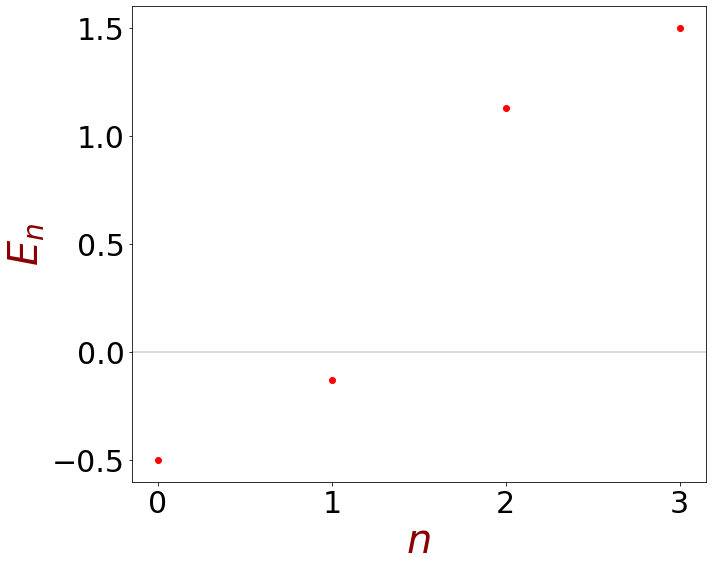

In [32]:
textsize = 30
#  plot for (p, x)
fig = plt.figure(figsize=(10,8))

font = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': textsize+10,
        }

fontTitle = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': textsize,
        }

plt.plot(eigenValues, 'ro')
plt.axhline(y=0, lw=0.3, c='k')
plt.xlabel('$n$', fontdict=font)
plt.ylabel('$E_n$', fontdict=font)
plt.tick_params(labelsize=textsize)
#plt.grid()
plt.tight_layout()
fig.savefig('images/quantum/2photons/energy_spectrum,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
plt.show()

<Figure size 432x288 with 0 Axes>

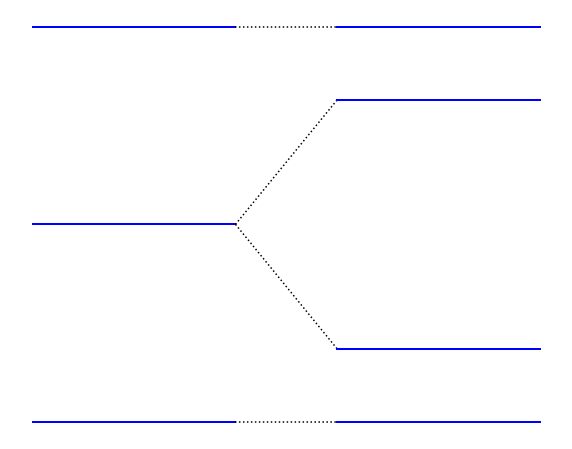

In [36]:
plt.figure()
plot_energy_levels([H0, Hint], figsize=(10,8))
plt.savefig('images/quantum/2photons/energy_levels,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)

In [5]:
# intial state
vac_estate = tensor(basis(N,0), basis(2,0))  # start with an excited atom |0, e>
one_gstate = tensor(basis(N,1), basis(2,1))  # |1, g>
vac_gstate = tensor(basis(N,0), basis(2,1))  # |0, g>
one_estate = tensor(basis(N,1), basis(2,0))  # |1, e>
print(vac_estate)
print(one_gstate)
print(vac_gstate)
print(one_estate)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


In [6]:
def f1(t): 
    step1 = (-1j*H*t).expm()*vac_estate
    step2 = vac_estate.trans()*step1
    return step1, step2

def f2(t): 
    step1 = (-1j*H*t).expm()*vac_estate
    step2 = one_gstate.trans()*step1
    return step1, step2

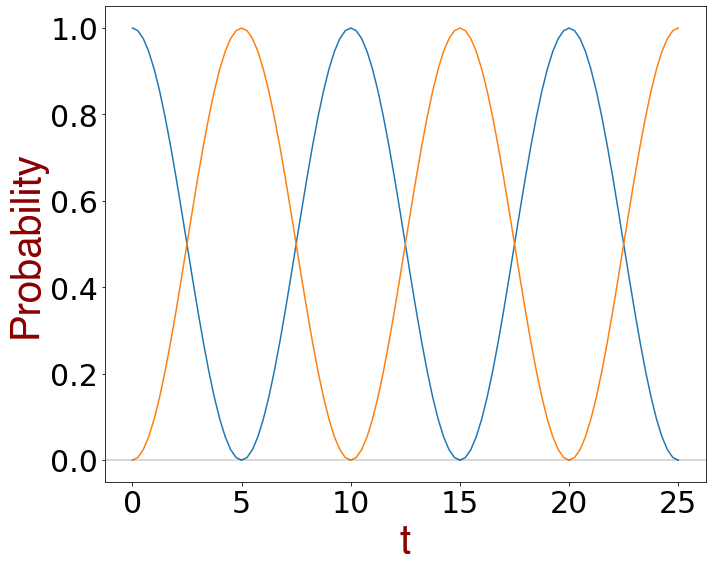

In [7]:
t = np.linspace(0, 25, 101)
f1(0)
p1 = [abs(complex(np.array(f1(i)[1])))**2 for i in t]
p2 = [abs(complex(np.array(f2(i)[1])))**2 for i in t]

fig = plt.figure(figsize=(10,8))
plt.plot(t, p1, '-', label=r'$\left | 0, e \right>$')
plt.plot(t, p2, '-', label=r'$\left | 1, g \right>$')
plt.axhline(y=0, lw=0.3, c='k')
plt.ylabel('Probability', fontdict=font)
plt.xlabel('t', fontdict=font)
plt.tick_params(labelsize=textsize)
#plt.grid()
plt.tight_layout()
fig.savefig('images/quantum/2photons/probdistJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
plt.show()

In [8]:
n_c = [f1(i)[0] for i in t]
n_a = [f2(i)[0] for i in t]

sx = tensor(qeye(N), sigmax())
sy = tensor(qeye(N), sigmay())
sz = tensor(qeye(N), sigmaz())

vec = [expect(sx, n_c), expect(sy, n_c), expect(sz, n_c)]
print(shape(vec)[1])

101


<Figure size 432x288 with 0 Axes>

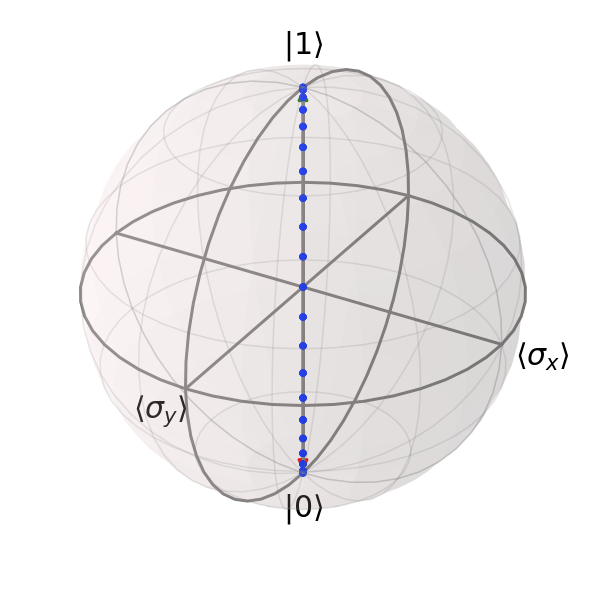

In [9]:
import matplotlib as mpl
from pylab import *
from matplotlib import cm
import imageio
import mayavi

#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(shape(vec)[1])]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(8,8))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_marker = ['o']
b.point_size = [40]
b.xlabel = [r'$\left<\sigma_y\right>$', ''] 
b.ylabel = [r'$\left<\sigma_x\right>$', '']
b.zlabel = [r'$\left|1\right>$', r'$\left|0\right>$']
b.frame_width = 3
b.sphere_alpha = 0.12

#b.add_states(states, 'point'
b.add_points(vec)
#b.add_points(vec, 'l')
b.add_vectors([vec[0][0], vec[1][0], vec[2][0]])
b.add_vectors([vec[0][-1], vec[1][-1], vec[2][-1]])
b.font_size = 30

nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(t))
colors = list(colors)
#colors[-1] = 'red'
#colors[0] = 'lime'
## add data points from expectation values ##
## customize sphere properties ##
b.point_color=colors

plt.tight_layout()
#b.view = [60, 60]

b.render()

bb = b.fig
bb.savefig('images/quantum/2photons/qubitJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)

## Wigner function

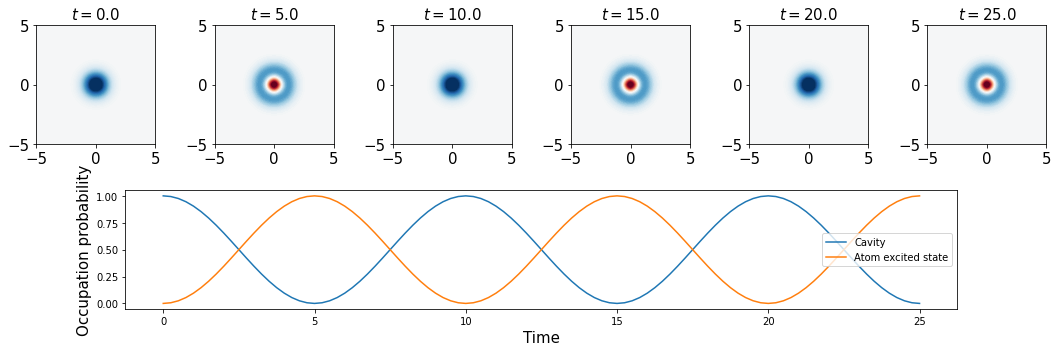

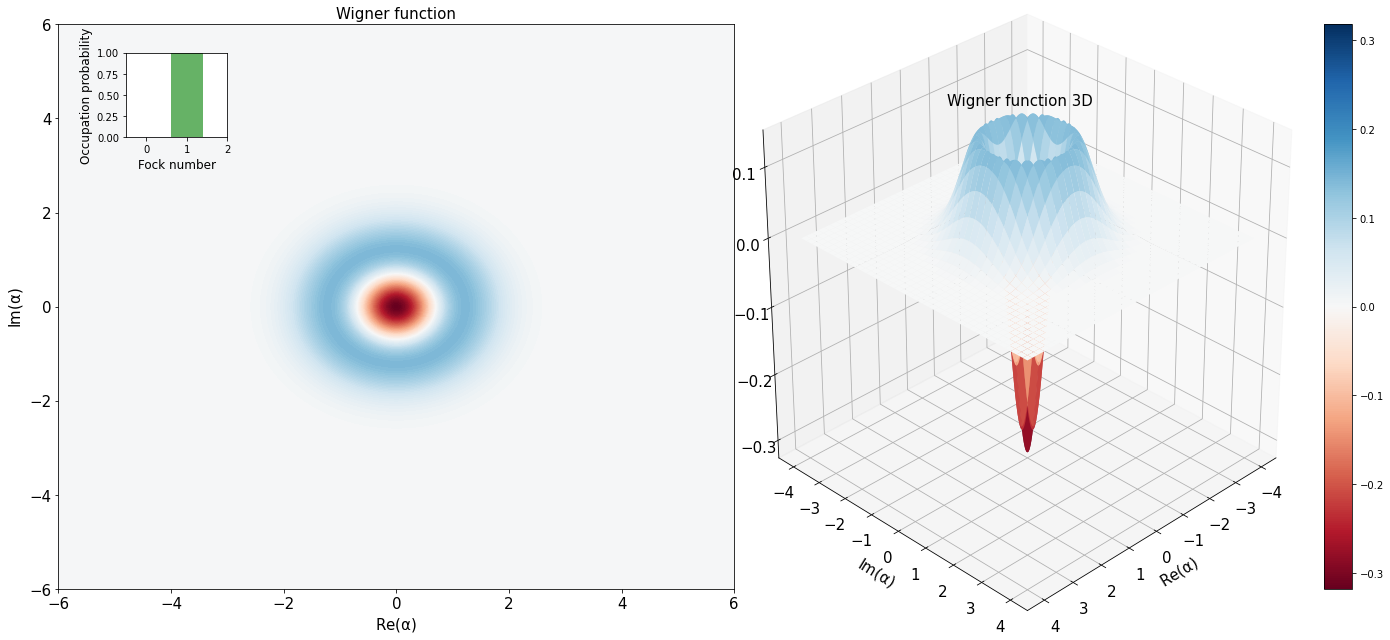

In [10]:
def plot_wigner_2d_3d(rho):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(20, 9))
    
    rho_cavity = ptrace(rho, 0)
    ax1 = fig.add_subplot(1, 2, 1)
    plot_wigner(rho_cavity, fig=fig, ax=ax1, alpha_max=6)
    ax2 = ax1.inset_axes([0.1, 0.8, 0.15, 0.15])
    plot_fock_distribution(rho_cavity, offset=0, fig=fig, ax=ax2)
    plt.tick_params(labelsize=textsize/2)
    ax1.xaxis.label.set_size(textsize/2)
    ax1.yaxis.label.set_size(textsize/2)
    ax1.set_title('Wigner function', fontsize=textsize/2)
    
    ax3 = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(rho_cavity, fig=fig, ax=ax3, projection='3d', alpha_max=4, colorbar=True)
    ax3.view_init(30, 45)
    plt.tick_params(labelsize=textsize/2)
    ax3.xaxis.label.set_size(textsize/2)
    ax3.yaxis.label.set_size(textsize/2)
    ax3.set_title('Wigner function 3D', fontsize=textsize/2)
    ax3.dist = 8.4
    plt.subplots_adjust(wspace=0.1)
    plt.tight_layout()
    plt.close(fig)
    return fig


t_idx = np.where([t == i for i in [0.0, 5.0, 10, 15, 20, 25]])[1]
rho_list = [n_c[x] for x in t_idx]
xvec = np.linspace(-5.,5.,100)
fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2.5*len(rho_list),5))

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % t[t_idx][idx], fontsize=textsize/2)
    plt.tight_layout()
    plt.tick_params(labelsize=textsize/2)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(t, p1, label="Cavity")
ax.plot(t, p2, label="Atom excited state")
ax.legend()
ax.set_xlabel('Time', fontsize=textsize/2)
ax.set_ylabel('Occupation probability', fontsize=textsize/2)
plt.tight_layout()
fig.savefig('images/quantum/2photons/wignerJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
plt.show()


rho = rho_list[3]
fig = plot_wigner_2d_3d(rho)
fig.savefig('images/quantum/2photons/wigner2d3dJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
fig

# Kicked Jaynes-Cummings

In [11]:
nT = 200  #  количество периодов
psi1 = []
psi1_prob = []
for n in range(nT):
    step1 = (-1j*H*n*Tk*g).expm()*(-1j*Hk*n).expm()*vac_estate
    step2 = np.abs(complex(np.asarray(vac_estate.trans().conj()*step1)))**2
    psi1.append(step1)
    psi1_prob.append(step2)
    
psi2 = []
psi2_prob = []
for n in range(nT):
    step1 = (-1j*H*n*Tk*g).expm()*(-1j*Hk*n).expm()*vac_estate
    step2 = np.abs(complex(np.asarray(one_gstate.trans().conj()*step1)))**2
    psi2.append(step1)
    psi2_prob.append(step2)
    
psi3 = []
psi3_prob = []
for n in range(nT):
    step1 = (-1j*H*n*Tk*g).expm()*(-1j*Hk*n).expm()*vac_estate
    step2 = np.abs(complex(np.asarray(vac_gstate.trans().conj()*step1)))**2
    psi3.append(step1)
    psi3_prob.append(step2)
    
psi4 = []
psi4_prob = []
for n in range(nT):
    step1 = (-1j*H*n*Tk*g).expm()*(-1j*Hk*n).expm()*vac_estate
    step2 = np.abs(complex(np.asarray(one_estate.trans().conj()*step1)))**2
    psi4.append(step1)
    psi4_prob.append(step2)
    
norm = [psi1[i].norm() for i in range(len(psi1))]

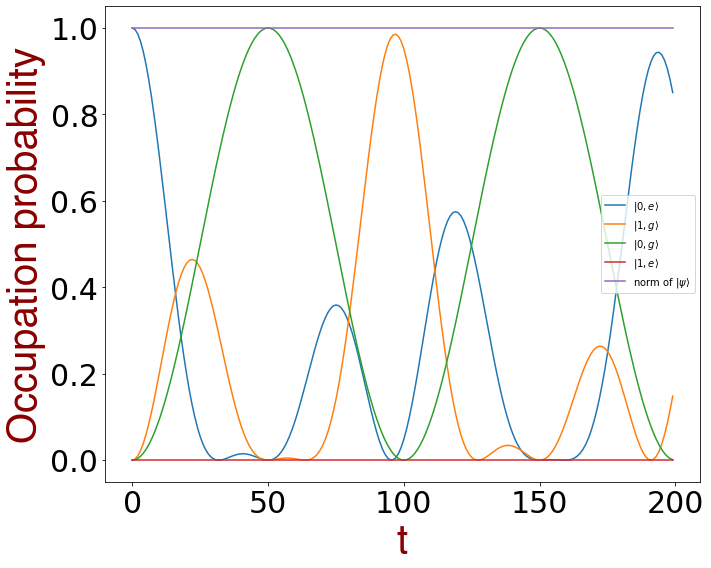

<Figure size 432x288 with 0 Axes>

In [15]:
states = psi1

vec = [expect(sx, states), expect(sy, states), expect(sz, states)]

plt.figure(figsize=(10,8))
plt.plot(psi1_prob, label=r'$\left | 0, e \right>$')
plt.plot(psi2_prob, label=r'$\left | 1, g \right>$')
plt.plot(psi3_prob, label=r'$\left | 0, g \right>$')
plt.plot(psi4_prob, label=r'$\left | 1, e \right>$')
plt.xlabel('t', fontdict=font)
plt.ylabel('Occupation probability', fontdict=font)
plt.plot(norm, label='norm of ' + r'$\left|\psi\right>$')
plt.tick_params(labelsize=textsize)
plt.legend()
#plt.grid()
plt.tight_layout()
plt.show()
plt.savefig('images/quantum/2photons/probdistKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)

<Figure size 432x288 with 0 Axes>

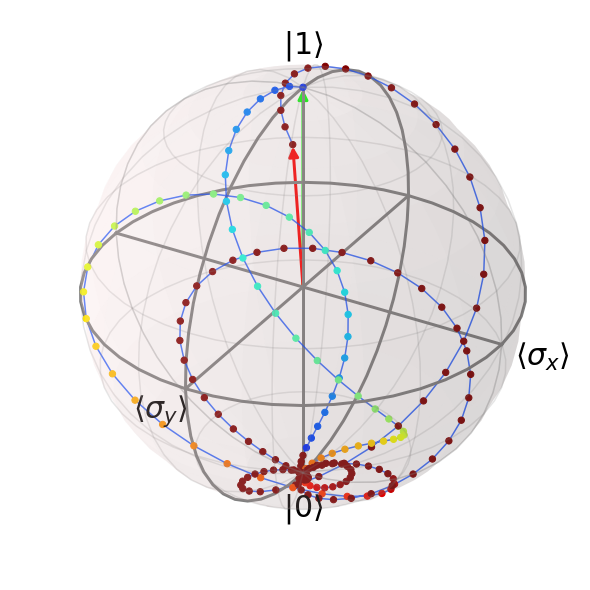

In [60]:
#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(8,8))

## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['lime', 'red']
b.point_marker = ['o']
b.point_size = [40]
b.xlabel = [r'$\left<\sigma_y\right>$', ''] 
b.ylabel = [r'$\left<\sigma_x\right>$', '']
b.zlabel = [r'$\left|1\right>$', r'$\left|0\right>$']
b.frame_width = 3
b.sphere_alpha = 0.12

#b.add_states(states, 'point'
b.add_points(vec, 'o')
b.add_points(vec, 'l')
b.add_vectors([vec[0][0], vec[1][0], vec[2][0]])
b.add_vectors([vec[0][-1], vec[1][-1], vec[2][-1]])
b.font_size = textsize

nrm=mpl.colors.Normalize(-2,10)
colors=cm.jet(nrm(t))
colors = list(colors)
#colors[-1] = 'red'
#colors[0] = 'lime'
## add data points from expectation values ##
## customize sphere properties ##
b.point_color=colors

plt.tight_layout()
#b.view = [60, 60]

b.render()

bb = b.fig
bb.savefig('images/quantum/2photons/qubitKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)

In [61]:
import os


def animate_bloch(vec, duration=0.1, save_all=False):

    b = Bloch(figsize=(12, 12))
    b.vector_color = ['r']
    #b.view = [-40,30]
    images=[]
    try:
        length = shape(vec)[1]
    except:
        length = 1
        vec = [vec]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.jet(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [40]
    b.xlabel = [r'$\left<\sigma_y\right>$', ''] 
    b.ylabel = [r'$\left<\sigma_x\right>$', '']
    b.zlabel = [r'$\left|1\right>$', r'$\left|0\right>$']
    b.frame_width = 3
    b.sphere_alpha = 0.12
    b.font_size = textsize
    
    for i in tqdm(range(length)):
        b.clear()
        b.add_vectors([vec[0][i], vec[1][i], vec[2][i]])
        b.add_points([vec[0][:(i+1)], vec[1][:(i+1)], vec[2][:(i+1)]], 'm')
        b.add_points([vec[0][:(i+1)], vec[1][:(i+1)], vec[2][:(i+1)]], 'l')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
        os.remove(filename)
    imageio.mimsave('images/quantum/2photons/bloch_animKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.gif', images, duration=duration)

In [62]:
animate_bloch(vec, duration=0.1, save_all=False)

100%|██████████| 200/200 [00:59<00:00,  3.33it/s]


## Plot 3D Bloch sphere

In [41]:
%%time
b = Bloch3d()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'

## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_size = 0.055
#b.add_points([n[0][0],n[1][0],n[2][0]]) # <-- add a 'm' string to signify 'multi' colored points
[b.add_points([vec[0][i],vec[1][i],vec[2][i]], 's') for i in range(len(states))]
b.sphere_color='0.1'
b.sphere_alpha=0.1
#b.render()
#b.show()

CPU times: user 2.66 s, sys: 472 ms, total: 3.13 s
Wall time: 3.96 s


## Wigner function

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.61284099+0.j        -0.24250872+0.1761929j]
 [-0.24250872-0.1761929j  0.38715901+0.j       ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.71290962+0.j         0.13979861-0.43025587j]
 [0.13979861+0.43025587j 0.28709038+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.99807799+0.j         0.01352078+0.04161269j]
 [0.01352078-0.04161269j 0.00192201+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 9.99949562e-01+0.j         -5.19880243e-03-0.00377715j]
 [-5.19880243e-03+0.00377715j  5.04382702e-05+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.65910259 0.34318677]


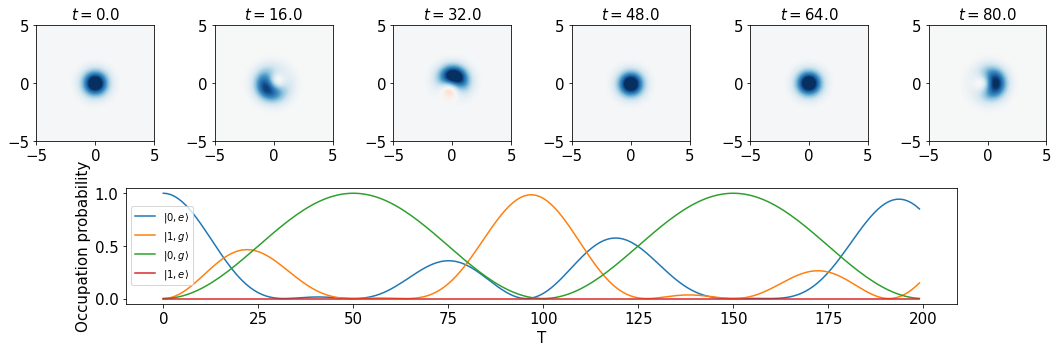

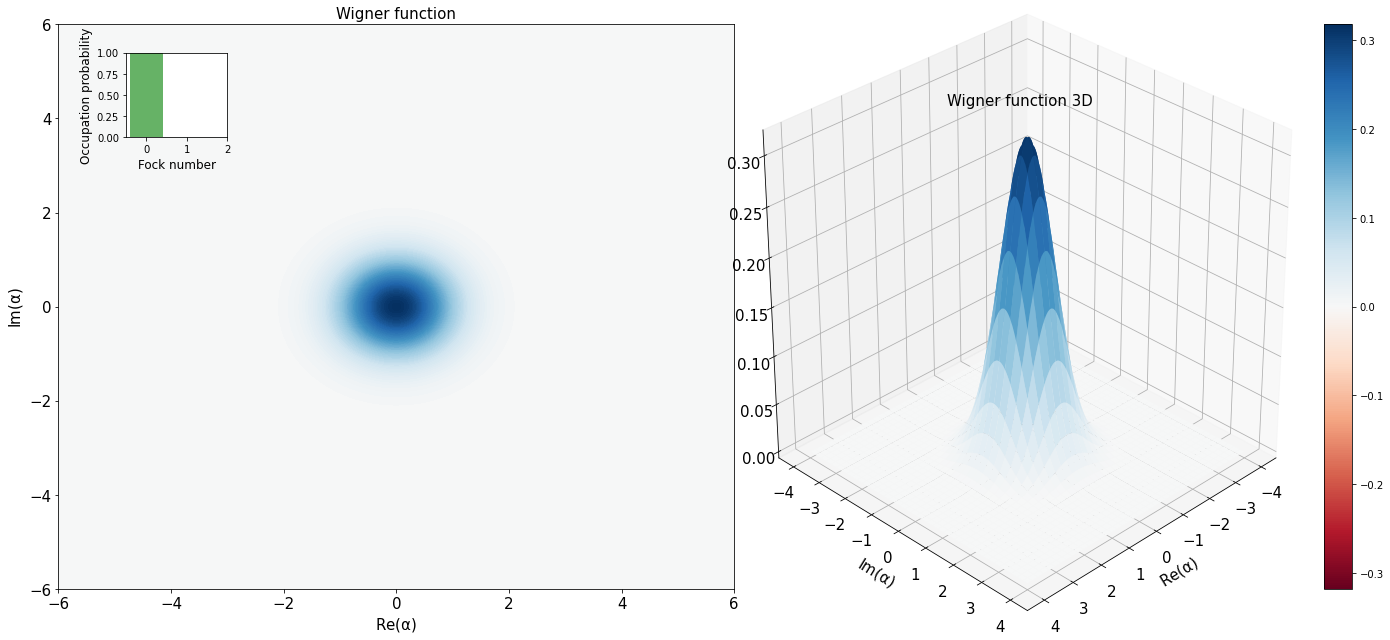

In [63]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.mplot3d import axes3d


Tlist = np.arange(0, nT, 1)
t_idx = np.where([Tlist == t for t in [0.0, 16.0, 32, 48, 64, 80]])[1]
rho_list = [psi1[x] for x in t_idx]

fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2.5*len(rho_list),5))

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    print(rho_cavity)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % Tlist[t_idx][idx], fontsize=textsize/2)
    plt.tight_layout()
    plt.tick_params(labelsize=textsize/2)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(Tlist, psi1_prob, label=r'$\left | 0, e \right>$')
ax.plot(Tlist, psi2_prob, label=r'$\left | 1, g \right>$')
ax.plot(Tlist, psi3_prob, label=r'$\left | 0, g \right>$')
ax.plot(Tlist, psi4_prob, label=r'$\left | 1, e \right>$')
ax.legend()
ax.set_xlabel('T', fontsize=textsize/2)
ax.set_ylabel('Occupation probability', fontsize=textsize/2)
plt.tick_params(labelsize=textsize/2)
#plt.grid()
plt.tight_layout()
fig.savefig('images/quantum/2photons/wignerKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
plt.show()


rho = rho_list[0]
fig = plot_wigner_2d_3d(rho)

fig.savefig('images/quantum/2photons/wigner2d3dKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.png', dpi=150)
fig

In [64]:
import os
from tqdm import tqdm


def animate_wigner(vec, duration=0.1, save_all=False):
    images=[]
    try:
        length = len(vec)
    except:
        length = 1
        vec = vec
    rho_list = [vec[x] for x in range(length)]
    for i in tqdm(range(length)):
        
        wig = plot_wigner_2d_3d(rho_list[i])

        #plt.close(fig)
        if save_all:
            wig.savefig(dirc='tmp') #saving images to tmp directory
            filename="tmp/wigner_%01d.png" % i
        else:
            filename='wig_temp_file.png'
            wig.savefig(filename)
        images.append(imageio.imread(filename))
        os.remove(filename)
    imageio.mimsave('images/quantum/2photons/wigner_animKJC,' + 'g=' + str(g) + ',N=' + str(N) + ',mu=' + str(mu) + 
            ',r=' + str(r) + '.gif', images, duration=duration)

In [65]:
animate_wigner(psi1)

100%|██████████| 200/200 [02:16<00:00,  1.46it/s]


In [122]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

Q, THETA, PHI = spin_q_function(psi1[0], theta, phi)

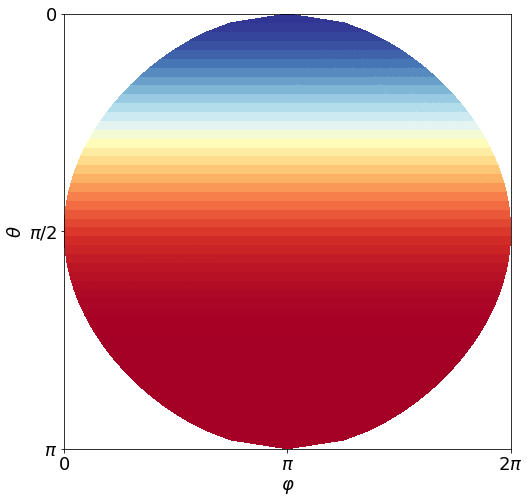

In [123]:
plot_spin_distribution_2d(Q, THETA, PHI);

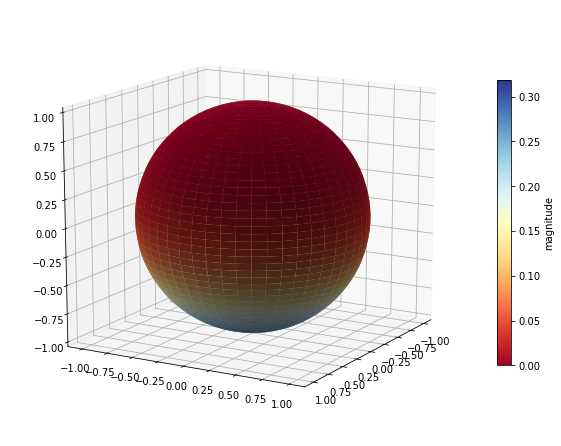

In [124]:
fig, ax = plot_spin_distribution_3d(Q, THETA, PHI);

ax.view_init(15, 30)

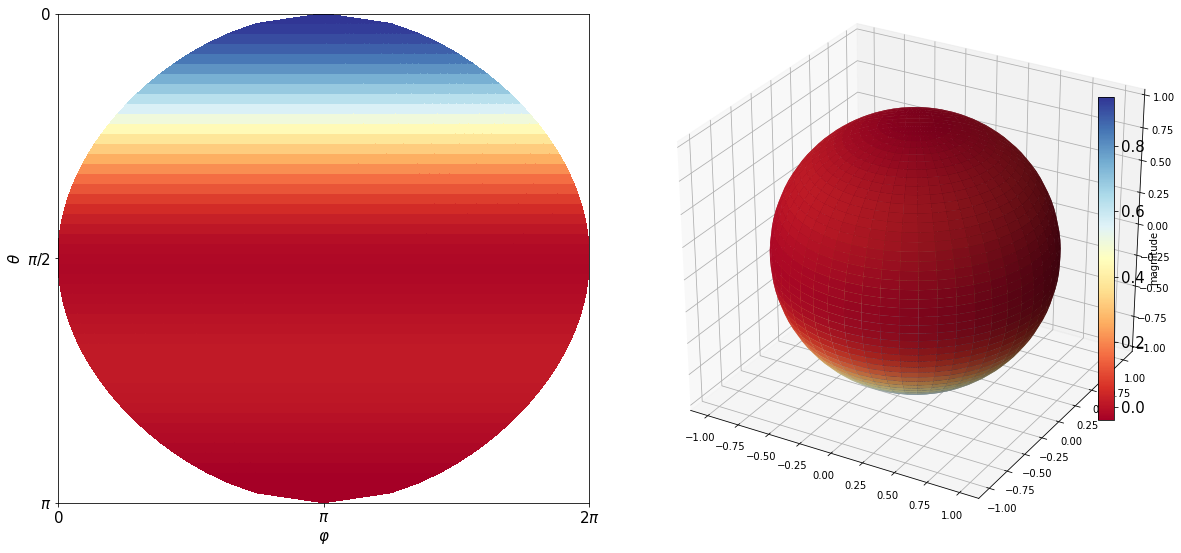

In [146]:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)

def plot_spin_wigner_2d_3d(rho):
    W, THETA, PHI = spin_wigner(rho, theta, phi)
    fig = plt.figure(figsize=(20,9))

    ax1 = fig.add_subplot(1, 2, 1)
    f1, a1 = plot_spin_distribution_2d(W.real, THETA, PHI, fig=fig, ax=ax1)
    plt.tick_params(labelsize=textsize/2)
    ax1.xaxis.label.set_size(textsize/2)
    ax1.yaxis.label.set_size(textsize/2)
    #ax1.set_title('Wigner function', fontsize=textsize/2)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    f2, a2 = plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax2)
    #ax2.view_init(30, 45)
    plt.tick_params(labelsize=textsize/2)
    ax2.xaxis.label.set_size(textsize/2)
    ax2.yaxis.label.set_size(textsize/2)
    ax2.dist = 9
    plt.subplots_adjust(wspace=0.1)
    #plt.tight_layout()
    plt.close(fig)
    return fig


def animate_spin_wigner(vec, duration=0.1, save_all=False):
    images=[]
    try:
        length = len(vec)
    except:
        length = 1
        vec = vec
    rho_list = [vec[x] for x in range(length)]
    for i in tqdm(range(length)):
        
        wig = plot_spin_wigner_2d_3d(rho_list[i])

        #plt.close(fig)
        if save_all:
            wig.savefig(dirc='tmp') #saving images to tmp directory
            filename="tmp/spinwigner_%01d.png" % i
        else:
            filename='spinwig_temp_file.png'
            wig.savefig(filename)
        images.append(imageio.imread(filename))
        os.remove(filename)
    imageio.mimsave('images/quantum/2photons/spin_wigner_animKJC,' + 'g=' + str(g) + ',N=' + str(N) +
                    ',mu=' + str(mu) + ',r=' + str(r) + '.gif', images, duration=duration)

    
def plot_spin_Q_2d_3d(rho):
    Q, THETA, PHI = spin_q_function(rho, theta, phi)
    fig = plt.figure(figsize=(20,9))

    ax1 = fig.add_subplot(1, 2, 1)
    f1, a1 = plot_spin_distribution_2d(Q, THETA, PHI, fig=fig, ax=ax1)
    plt.tick_params(labelsize=textsize/2)
    ax1.xaxis.label.set_size(textsize/2)
    ax1.yaxis.label.set_size(textsize/2)
    #ax1.set_title('Wigner function', fontsize=textsize/2)

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    f2, a2 = plot_spin_distribution_3d(Q, THETA, PHI, fig=fig, ax=ax2)
    #ax2.view_init(30, 45)
    plt.tick_params(labelsize=textsize/2)
    ax2.xaxis.label.set_size(textsize/2)
    ax2.yaxis.label.set_size(textsize/2)
    ax2.dist = 9
    plt.subplots_adjust(wspace=0.1)
    #plt.tight_layout()
    plt.close(fig)
    return fig


def animate_spin_Q(vec, duration=0.1, save_all=False):
    images=[]
    try:
        length = len(vec)
    except:
        length = 1
        vec = vec
    rho_list = [vec[x] for x in range(length)]
    for i in tqdm(range(length)):
        
        wig = plot_spin_Q_2d_3d(rho_list[i])

        #plt.close(fig)
        if save_all:
            wig.savefig(dirc='tmp') #saving images to tmp directory
            filename="tmp/spinwigner_%01d.png" % i
        else:
            filename='spinwig_temp_file.png'
            wig.savefig(filename)
        images.append(imageio.imread(filename))
        os.remove(filename)
    imageio.mimsave('images/quantum/2photons/spin_Qfunc_animKJC,' + 'g=' + str(g) + ',N=' + str(N) +
                    ',mu=' + str(mu) + ',r=' + str(r) + '.gif', images, duration=duration)


plot_spin_wigner_2d_3d(psi1[0])

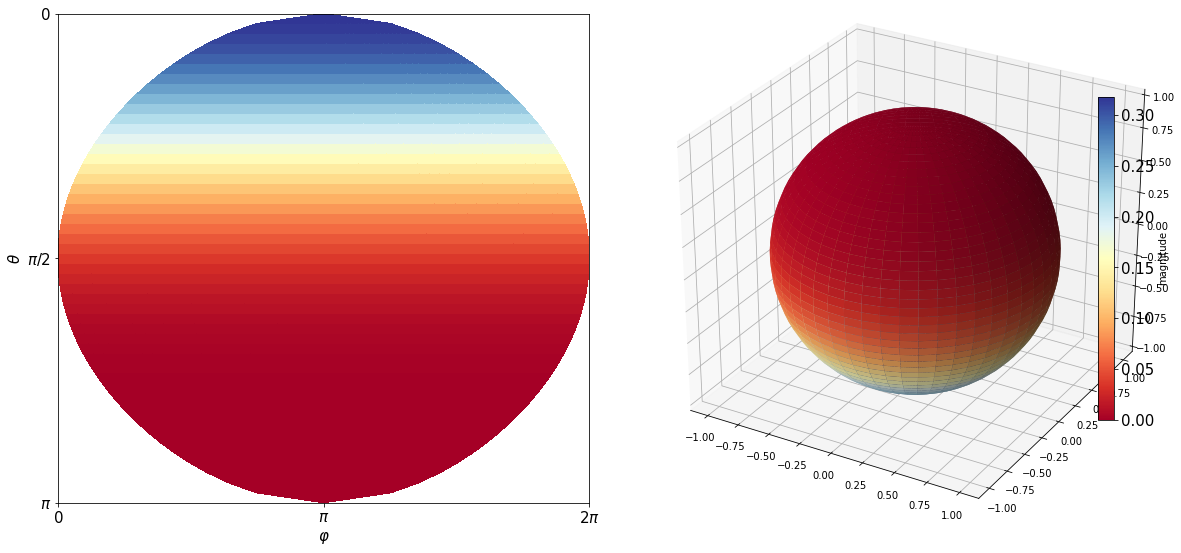

In [147]:
plot_spin_Q_2d_3d(psi1[0])

In [141]:
animate_spin_wigner(psi1)

100%|██████████| 200/200 [02:52<00:00,  1.16it/s]


In [ ]:
animate_spin_Q(psi1)

100%|██████████| 200/200 [02:59<00:00,  1.12it/s]
